## Get Access to GPU's
<a id='1.kısım'></a>

Tensors can work with GPU's. We will want to work with GPU's when we build big models. You can check your GPU's with [`tf.config.list_physical_devices()`](https://www.tensorflow.org/guide/gpu) function.

In [1]:
import tensorflow as tf
import numpy as np

print(tf.config.list_physical_devices('GPU'))

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPUs


* `nvidia-smi` shows more information about GPU

In [2]:
!nvidia-smi

Tue Mar 28 12:40:03 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.18                 Driver Version: 531.18       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090 Ti    WDDM | 00000000:01:00.0  On |                  Off |
|  0%   57C    P2              109W / 450W|   1630MiB / 24564MiB |      8%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## What's the tensors ?
<a id='2.part'></a>

Picture from Vikipedia ***tensor***:
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Components_stress_tensor.svg/1200px-Components_stress_tensor.svg.png" width="500"/>
</div>

You could think tensors as a NumPy array. **just for now** 

Tensors can express anything or a numerical value:
* **The numbers themselves can be:** Tensor can be used to represent the price of houses.
* **An image can be:** Tensors can be used to represent the pixels of an image.
* **Text can be:** Tensors can be used to represent words.
* Or it may be another form of information or data that you want to represent with numbers.


The main difference between tensors and NumPy arrays (an n-dimensional array of numbers) is that tensors are Decoupled in [GPUs or TPUs (graphics/tensor processing units)](https://blogs.nvidia.com/blog/2009/12 /) it can be used.
The benefit of being able to work on GPUs and TPUs is that calculations can be performed faster.
This means that if we want to find patterns in the data that our data represents numerically (deep learning), we can usually find them faster using GPUs and TPUs.

In [3]:
print(tf.__version__) # 2.7.0

2.10.1


### Creating Tensors with `tf.constant()` (https://www.tensorflow.org/api_docs/python/tf/constant ) 

When creating a model, TensorFlow will convert most things to tensor for us. ([tf.data])https://www.tensorflow.org/guide/data ) and [tf.io ](https://www.tensorflow.org/api_docs/python/tf/io ))

In [4]:
# Lets create a scaler tensor
skalar = tf.constant(53)
skalar

<tf.Tensor: shape=(), dtype=int32, numpy=53>

The rank of the scalar tensors is 0. Because there are no dimensions, it is just a number.

In terms of TensorFlow, there is no limit to the dimensions of tensors.

In [5]:
# We can check dimension with .ndim attribute.
# ndim = number of dimensions
skalar.ndim

0

In [6]:
vector = tf.constant([1,2])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2])>

In [7]:
vector.ndim

1

In [8]:
matris = tf.constant([ [1,2],
                       [3,4]])
matris

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

In [9]:
matris.ndim

2

TensorFlow sets numeric values as `float32` or `int32` by default.

In [10]:
# dtype değiştirmek için
matris = tf.constant([[11.5, 0.2],
                              [10.3, 5.7],
                              [11.8, 2.03]], dtype=tf.float64)
matris

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[11.5 ,  0.2 ],
       [10.3 ,  5.7 ],
       [11.8 ,  2.03]])>

In [11]:
matris.ndim

2

In [12]:
# Stablize the dimension
assert matris.ndim == 2

In [13]:
tensor = tf.constant([[ [0,1,2],
                        [3,4,5]],
                       
                      [ [10,20,30],
                        [50,60,70]],
                     
                      [ [100,200,300],
                        [400,500,600]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[  0,   1,   2],
        [  3,   4,   5]],

       [[ 10,  20,  30],
        [ 50,  60,  70]],

       [[100, 200, 300],
        [400, 500, 600]]])>

In [14]:
tensor.ndim

3

#### Lets show it with a picture:

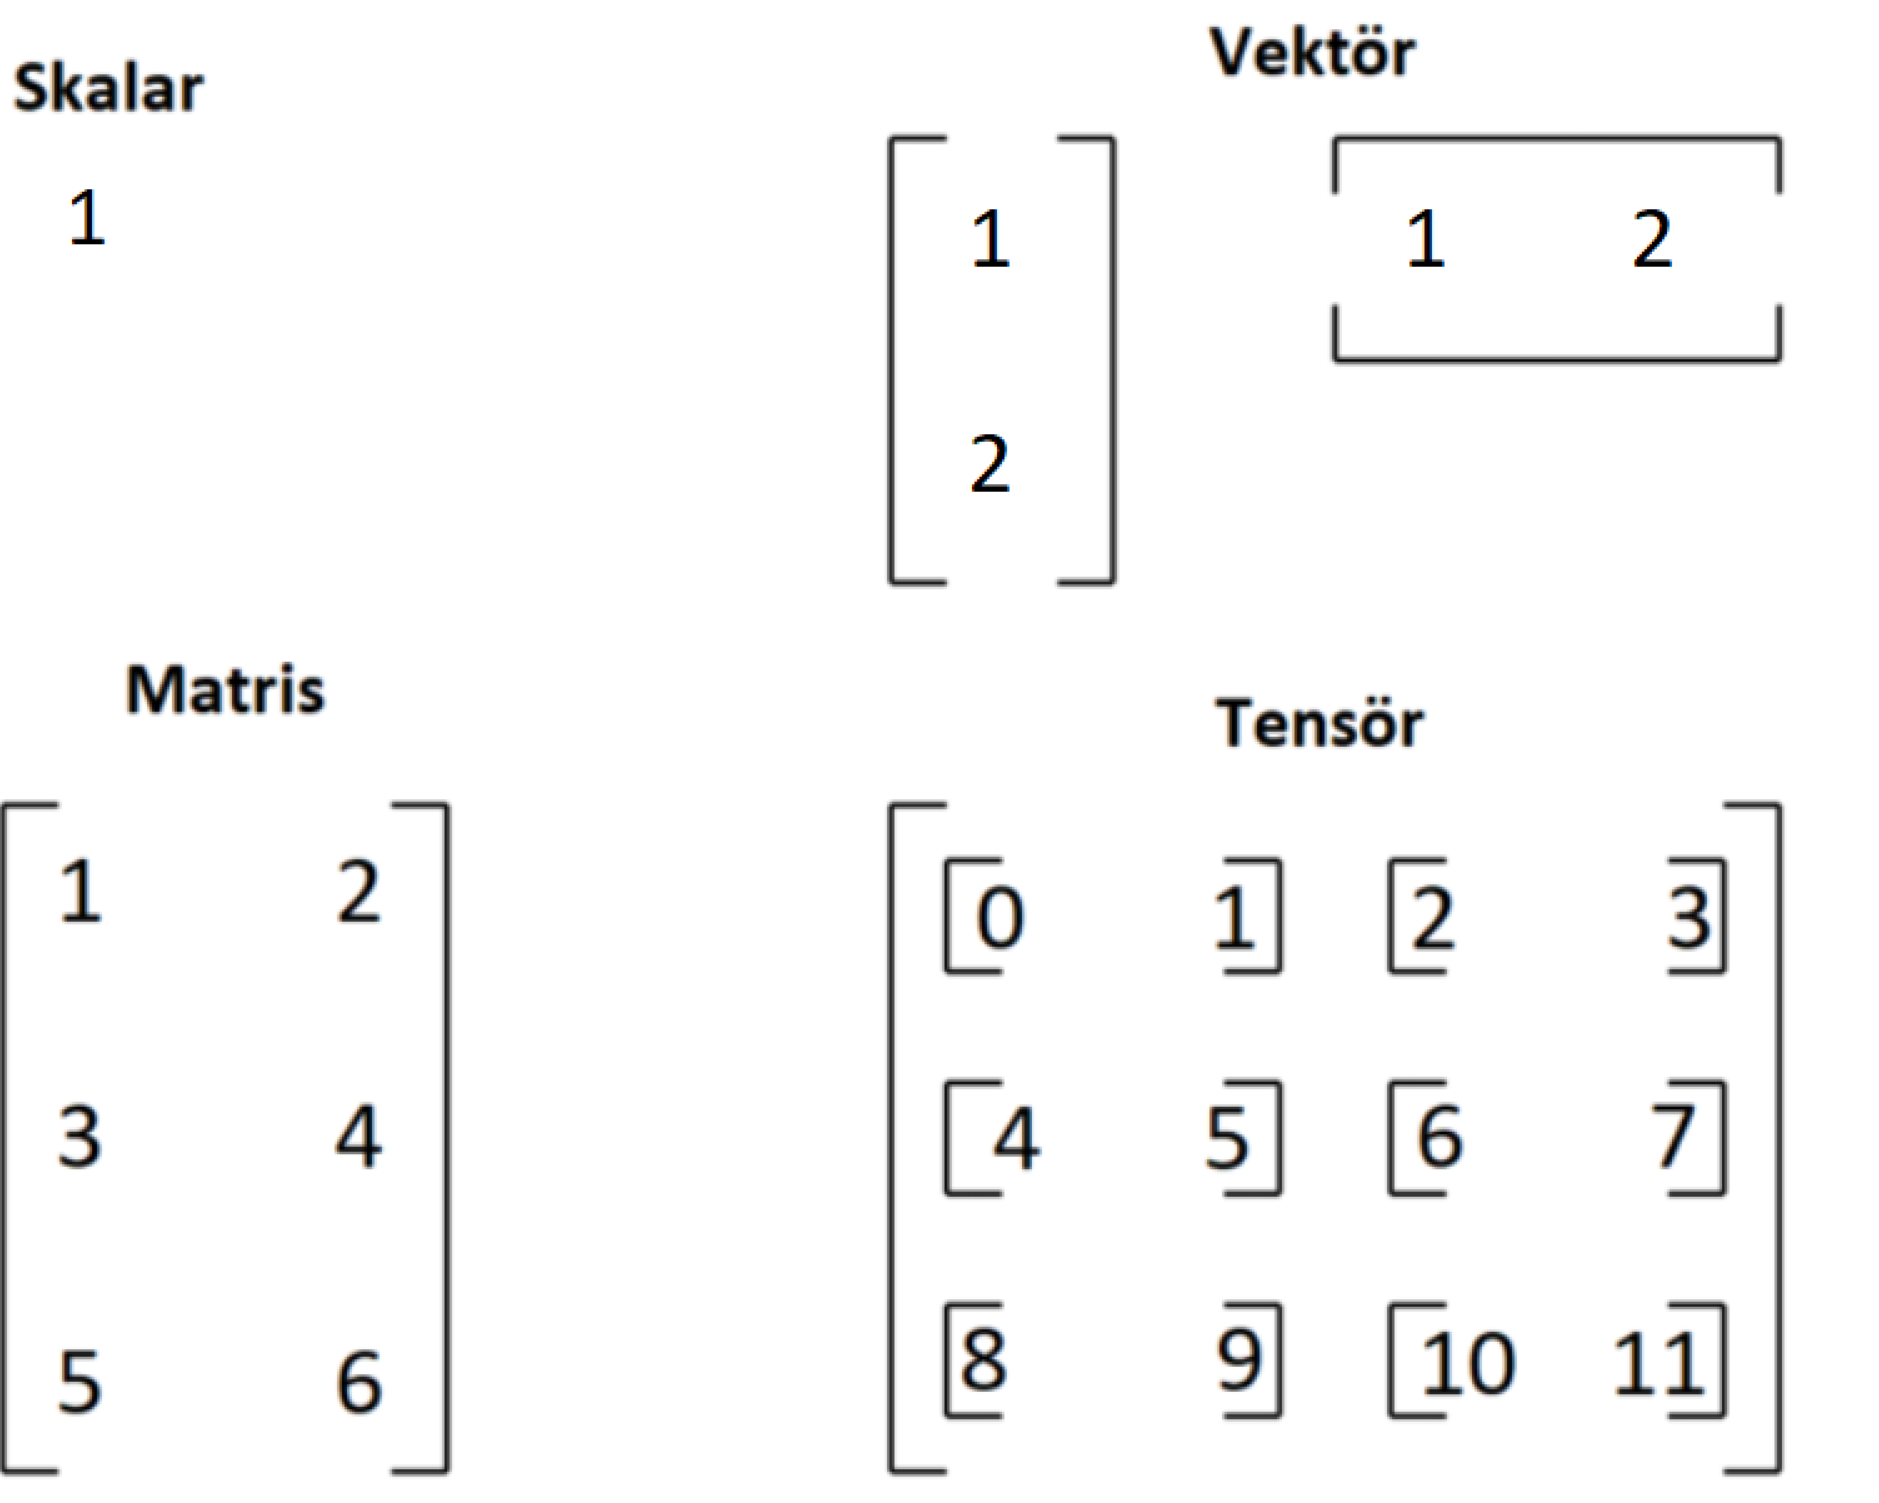

### Create a Tensor with `tf.Variable()` (https://www.tensorflow.org/api_docs/python/tf/Variable )

Differences between `tf.Variable' and 'tf.constant`:
* 'tf.Variable  'mutable' --> The value can be changed.
* 'tf.constant  'immutable' --> remains constant, does not change.

We will mention the main crucial difference in the GradientTape section.

In [15]:
# Numeric tensors
tf_variable_tensor = tf.Variable([3, 6])
tf_constant_tensor = tf.constant([18, 9])
tf_variable_tensor, tf_constant_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([3, 6])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([18,  9])>)

If we try to change the elements of a tensor that forms created with `'tf.Variable'`, we will give error:

In [17]:
tf_variable_tensor[0] = 53
tf_variable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

We Should use .assign() method for change values inside the tensor created with `'tf.Variable'`

In [18]:
# It works with .assign() method
tf_variable_tensor[0].assign(53)
tf_variable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([53,  6])>

But We can't change the values of tensors which is created by `'tf.constant()'`

In [19]:
tf_constant_tensor[0].assign(53)
tf_constant_tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

So which one should we use when creating tensors? `'tf.is constant()'` or `'tf.Variable()'` ?

Most of the time, TensorFlow will set this up for us in the background while we are writing the model.

### Mixing Tensor Elements with `'tf.random.shuffle'` (https://www.tensorflow.org/api_docs/python/tf/random/shuffle ) 

It is also very important to mix the elements in the tensor. Deep Learning models are very prone to overfitting. Depending on any factor, they may overfit the data(memorizing the train data). On the other hand,

Example labels:

`0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1` if we consider a data that is, it is important to mix the elements in the tensor. When Decoupling such a sorted data as a train-test, we can create an imbalance between classes.

In [20]:
tensor = tf.constant([[1, 21],
                            [348, 4],
                            [50, 6],
                            [22, 11]])

# It gives always different result.
tf.random.shuffle(tensor)

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[348,   4],
       [  1,  21],
       [ 22,  11],
       [ 50,   6]])>

In [21]:
tf.random.shuffle(tensor)

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[ 50,   6],
       [348,   4],
       [ 22,  11],
       [  1,  21]])>

In [22]:
# Lets look out the seed parameter
tf.random.shuffle(tensor, seed= 53)

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[  1,  21],
       [ 22,  11],
       [ 50,   6],
       [348,   4]])>

In [23]:
tf.random.shuffle(tensor, seed= 53)

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[ 22,  11],
       [  1,  21],
       [348,   4],
       [ 50,   6]])>

--> even though we gave `seed`, the shuffle results turned out to be different.

If we want the same results here, it will not be enough to determine the operational seed. We also need to set up a global seed.

In [24]:
# We gave same shuffle always in this ways.

seed = 53

for _ in range(5):
  # Set Global seed
  tf.random.set_seed(seed)

  # Set operational seed
  print(tf.random.shuffle(tensor, seed=seed)) 

tf.Tensor(
[[348   4]
 [  1  21]
 [ 50   6]
 [ 22  11]], shape=(4, 2), dtype=int32)
tf.Tensor(
[[348   4]
 [  1  21]
 [ 50   6]
 [ 22  11]], shape=(4, 2), dtype=int32)
tf.Tensor(
[[348   4]
 [  1  21]
 [ 50   6]
 [ 22  11]], shape=(4, 2), dtype=int32)
tf.Tensor(
[[348   4]
 [  1  21]
 [ 50   6]
 [ 22  11]], shape=(4, 2), dtype=int32)
tf.Tensor(
[[348   4]
 [  1  21]
 [ 50   6]
 [ 22  11]], shape=(4, 2), dtype=int32)


Creating Tensor with other Functions

`tf.ones()` , `tf.fill()` and `tf.zeros()` etc.

In [25]:
tf.ones(shape= (3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [26]:
tf.fill((2,3) , -1)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[-1, -1, -1],
       [-1, -1, -1]])>

In [27]:
tf.zeros((3,5))

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

We can also convert numpy arrays into tensors using `tf.constant()`

Matrices or tensors are usually named with capital letters. The vectors are named with small letters.

In [28]:
import numpy as np

np_array = np.arange(1, 13)

k = tf.constant(np_array,  
                shape=[2, 3, 2]) 
print(np_array) 
print(k) 

[ 1  2  3  4  5  6  7  8  9 10 11 12]
tf.Tensor(
[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]], shape=(2, 3, 2), dtype=int32)


You can also do this using [`tf.convert_to_tensor()`](https://www.tensorflow.org/api_docs/python/tf/convert_to_tensor)

In [29]:
n = tf.convert_to_tensor(np_array) # it doesn't have shape argument.
n = tf.reshape(n, [2,3,2]) # But you can reshape it this way.
n

<tf.Tensor: shape=(2, 3, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])>

## Access Tensors informations(shape, rank, size, axis etc.)

In [30]:
tensor_4_rank = tf.ones(shape= (2, 3, 4, 6))
tensor_4_rank

<tf.Tensor: shape=(2, 3, 4, 6), dtype=float32, numpy=
array([[[[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]]], dtype=float32)>

In [31]:
print(tensor_4_rank.shape)
print(tensor_4_rank.ndim)
print(tf.size(tensor_4_rank))
print(tf.shape(tensor_4_rank))

(2, 3, 4, 6)
4
tf.Tensor(144, shape=(), dtype=int32)
tf.Tensor([2 3 4 6], shape=(4,), dtype=int32)


In [32]:
print("Elements dtypes:", tensor_4_rank.dtype)
print("Dimensions or Ranks:", tensor_4_rank.ndim)
print("Tensor's shape:", tensor_4_rank.shape)
print("Number of items at 0.axis:", tensor_4_rank.shape[0])
print("Number of items at last axis:", tensor_4_rank.shape[-1])
print("Number of total elements:", tf.size(tensor_4_rank).numpy())

Elements dtypes: <dtype: 'float32'>
Dimensions or Ranks: 4
Tensor's shape: (2, 3, 4, 6)
Number of items at 0.axis: 2
Number of items at last axis: 6
Number of total elements: 144


It is also possible to index tensors just like python lists.

In [33]:
# Get first 2 elements in all dimensions
tensor_4_rank[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]],


       [[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]]], dtype=float32)>

In [34]:
tensor_2_rank = tf.constant([[1, 2],
                             [3, 4]])

tensor_2_rank[:, -1] # Get last elements from all rows

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 4])>

## We can add new dimensions to tensors. There is 2 different way `tf.newaxis()` and `tf.expand_dims()`

In [35]:
tensor_3_rank = tensor_2_rank[..., tf.newaxis] # Pythonic way

alternatif_3_rank_tensor = tf.expand_dims(tensor_2_rank, axis = -1)

print('Rank 2:', tensor_2_rank, '\n\n') 
print('Rank 3:', tensor_3_rank, '\n\n') 
print('Rank 3 alternatif:', alternatif_3_rank_tensor)

Rank 2: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 


Rank 3: tf.Tensor(
[[[1]
  [2]]

 [[3]
  [4]]], shape=(2, 2, 1), dtype=int32) 


Rank 3 alternatif: tf.Tensor(
[[[1]
  [2]]

 [[3]
  [4]]], shape=(2, 2, 1), dtype=int32)


## Manipulate Tensors

### Mathematical Functions

In [36]:
tensor = tf.constant([[14, 28], [42, 56]])
print(id(tensor))

print(id(tensor + 10))
print(tensor + 10)

2668015072064
2668015073216
tf.Tensor(
[[24 38]
 [52 66]], shape=(2, 2), dtype=int32)


Original tensor didin't change because we didin't assign it.

In [37]:
# Original tensor
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 28],
       [42, 56]])>

In [38]:
# Now original tensor is changed too
tensor = tensor + 10
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[24, 38],
       [52, 66]])>

In [39]:
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[240, 380],
       [520, 660]])>

In [40]:
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 28],
       [42, 56]])>

It is a better practice to use the functions implemented by TensorFlow as much as possible. This is necessary so that there is no problem with TensorFlow's graph. TensorFlow needs its own functions to be able to track transactions. This is inevitable, especially in gradient calculation.

In [41]:
tf.multiply(tensor , 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[240, 380],
       [520, 660]])>

In [42]:
# Original didin't changed.
tensor 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[24, 38],
       [52, 66]])>

In [43]:
tensor = tf.multiply(tensor , 10)
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[240, 380],
       [520, 660]])>

## Matrix Multiply

There are 3 ways for matrix multiply:
* [`tf.matmul()`](https://www.tensorflow.org/api_docs/python/tf/linalg/matmul)
* [`tf.tensordot()`](https://www.tensorflow.org/api_docs/python/tf/tensordot)
* [`tf.einsum()`](https://www.tensorflow.org/api_docs/python/tf/einsum) -- > We will talk about it later.

In [44]:
tensor = tf.constant([[14, 28], [42, 56]])
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 28],
       [42, 56]])>

In [45]:
print(tensor, '\n\n')
print('Matrix Multiply with itself:', tf.matmul(tensor, tensor))

tf.Tensor(
[[14 28]
 [42 56]], shape=(2, 2), dtype=int32) 


Matrix Multiply with itself: tf.Tensor(
[[1372 1960]
 [2940 4312]], shape=(2, 2), dtype=int32)


In [46]:
# We can also do it with @ python operator
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1372, 1960],
       [2940, 4312]])>

Tensors shape must be correct.

In [47]:
# (3,2) Tensor
tensor_1 = tf.constant([[10, 20],
                 [30, 40],
                 [50, 60]])

# (3,2) Tensor
tensor_2 = tf.constant([[1, 2],
                 [4, 45],
                 [1, 0]])

print(tensor_1)
print(tensor_2)

tf.Tensor(
[[10 20]
 [30 40]
 [50 60]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[ 1  2]
 [ 4 45]
 [ 1  0]], shape=(3, 2), dtype=int32)


In [48]:
tensor_1 @ tensor_2

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul]

First tensor's column size must be equal to second tensors rows

What can we do now ? 
* We can transpose to `tensor_1`
* We could reshape `tensor_2` shape to  `(2, 3)`

* [`tf.reshape()`](https://www.tensorflow.org/api_docs/python/tf/reshape)
* [`tf.transpose()`](https://www.tensorflow.org/api_docs/python/tf/transpose)

In [49]:
# (3, 2) --> (2, 3)
tf.reshape(tensor_1 , shape = (2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[10, 20, 30],
       [40, 50, 60]])>

In [50]:
# We can do matrix multiply now (3, 2) * (2, 3)
tensor_1 @ tf.reshape(tensor_2, shape=(2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 910,   40,   40],
       [1830,  100,  120],
       [2750,  160,  200]])>

In [51]:
# tensor_1'in transpozu
tf.transpose(tensor_1)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[10, 30, 50],
       [20, 40, 60]])>

In [52]:
# Aynı matris çarpımı transpoz ile (2, 3) (3, 2)
tf.matmul(tf.transpose(tensor_1), tensor_2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 180, 1370],
       [ 240, 1840]])>

In [53]:
# We can use transpose parameter in tf.matmul() function.
tf.matmul(a = tensor_1 , b = tensor_2,
          transpose_a= True , transpose_b= False)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 180, 1370],
       [ 240, 1840]])>

### `tf.transpose()` - perm parameter

We can change axixes

In [54]:
x = tf.random.normal([2,2,32,3]) # 2, 2, 32, 3
print(x.shape)
tf.transpose(x).shape

(2, 2, 32, 3)


TensorShape([3, 32, 2, 2])

In [55]:
x = tf.random.normal([2, 2, 32, 3, 1])
tf.transpose(x).shape

TensorShape([1, 3, 32, 2, 2])

In [56]:
tf.transpose(x, perm = [0, 3, 2, 1, 4]).shape # (32, 32, 3) 3 --> derinlik rgb (3, 32, 32)

TensorShape([2, 3, 32, 2, 1])

## Dot Product

We can do matrix multiply with `tf.tensordot()` instead of `tf.matmul()`

For simple operations `tf.matmul()` more fast and logical because `tf.matmul()` func's graph are more basic.
`tf.matmul()` working simplier than tf.tensordot()

In [57]:
tf.tensordot(tf.transpose(tensor_1) , tensor_2 , axes = 1) # if axes = 1 its equal to tf.matmul()

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 180, 1370],
       [ 240, 1840]])>

In [58]:
tf.matmul(tensor_1, tf.transpose(tensor_2))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[  50,  940,   10],
       [ 110, 1920,   30],
       [ 170, 2900,   50]])>

In [59]:
tf.matmul(tensor_1, tf.reshape(tensor_2, (2, 3))) # why different ?

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 910,   40,   40],
       [1830,  100,  120],
       [2750,  160,  200]])>

In [60]:
print('tensor_2 shape:', tensor_2.shape)
print('tensor_2 - Reshape edildi:', tf.reshape(tensor_2, (2, 3)).shape)
print('tensor_2 Transpoz - Shape:', tf.transpose(tensor_2).shape) # Even if their shape is same, their results are different.

tensor_2 shape: (3, 2)
tensor_2 - Reshape edildi: (2, 3)
tensor_2 Transpoz - Shape: (2, 3)


In [61]:
# Lets print reshape and  transpose matrixes
print("Normal tensor_2:")
print(tensor_2, "\n")

print("tensor_2 reshape edildi --> (2, 3):")
print(tf.reshape(tensor_2, (2, 3)), "\n")

print("tensor_2 transpoz edilince:")
print(tf.transpose(tensor_2))

Normal tensor_2:
tf.Tensor(
[[ 1  2]
 [ 4 45]
 [ 1  0]], shape=(3, 2), dtype=int32) 

tensor_2 reshape edildi --> (2, 3):
tf.Tensor(
[[ 1  2  4]
 [45  1  0]], shape=(2, 3), dtype=int32) 

tensor_2 transpoz edilince:
tf.Tensor(
[[ 1  4  1]
 [ 2 45  0]], shape=(2, 3), dtype=int32)


As you see, even if their shape is same, their values are different.

`tf.reshape()` or `tf.transpose()` which one is better ?

Most of time we will use `tf.transpose()` if there is shape problem.

## Change the dtype of Tensor

We can do this with tf.cast() function

In [62]:
tensor = tf.constant([1.6 , 8.5])

tensor # dtype float32 default.

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.6, 8.5], dtype=float32)>

In [63]:
tensor = tf.cast(tensor , dtype= tf.float16)
print(tensor)

tf.Tensor([1.6 8.5], shape=(2,), dtype=float16)


In [64]:
tensor = tf.cast(tensor , dtype= tf.float32)
print(tensor)

tf.Tensor([1.5996094 8.5      ], shape=(2,), dtype=float32)


## Tensor's absolute

`tf.abs()` function can do the absolute of all tensor values

In [65]:
tensor = tf.constant([-15 , -7 , 5])
tf.abs(tensor)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([15,  7,  5])>

## Square , Sqrt , Log Math Operations

Probably already have function you need in tensorflow for math operations.
* `tf.square()`
* `tf.sqrt()` (Need float)
* `tf.math.log()` (Need float)

In [66]:
tensor = tf.constant(tf.range(1,10))
tensor

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [67]:
tf.square(tensor)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])>

In [68]:
tf.sqrt(tensor) # You need do dtype as float

InvalidArgumentError: Value for attr 'T' of int32 is not in the list of allowed values: bfloat16, half, float, double, complex64, complex128
	; NodeDef: {{node Sqrt}}; Op<name=Sqrt; signature=x:T -> y:T; attr=T:type,allowed=[DT_BFLOAT16, DT_HALF, DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_COMPLEX128]> [Op:Sqrt]

In [69]:
tf.sqrt(tf.cast(tensor , tf.float16))

<tf.Tensor: shape=(9,), dtype=float16, numpy=
array([1.   , 1.414, 1.732, 2.   , 2.236, 2.45 , 2.646, 2.828, 3.   ],
      dtype=float16)>

In [70]:
tf.math.log(tf.cast(tensor , tf.float16))

<tf.Tensor: shape=(9,), dtype=float16, numpy=
array([0.    , 0.6934, 1.099 , 1.387 , 1.609 , 1.792 , 1.946 , 2.08  ,
       2.197 ], dtype=float16)>

## Minimum , Maksimum , Mean , Sum

* `tf.reduce_min()`
* `tf.reduce_max()`
* `tf.reduce_mean()`
* `tf.reduce_sum()`

This functions also in tf.math module.

In [71]:
tensor = tf.constant(np.random.randint(0,1000, 10))
tensor

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([413, 355, 881, 564, 420, 760, 911, 313, 616, 870])>

In [72]:
tf.reduce_min(tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=313>

In [73]:
tf.reduce_max(tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=911>

In [74]:
tf.reduce_mean(tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=610>

In [75]:
tf.reduce_sum(tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=6103>

## Operations with Tensors

In [76]:
# skaler. Shape: ()
x = 2
tf_x = tf.constant(x)
print('x:', x)
print('tf_x:', tf_x)
print('tf_x type:', type(tf_x))

x: 2
tf_x: tf.Tensor(2, shape=(), dtype=int32)
tf_x type: <class 'tensorflow.python.framework.ops.EagerTensor'>


In [77]:
# To do vector we just need [x] syntax and add 1 dimension. Shape: (1, )
x = 2
tf_x = tf.constant([x])
print('x:', x)
print('tf_x:', tf_x)
print('tf_x type:', type(tf_x))

x: 2
tf_x: tf.Tensor([2], shape=(1,), dtype=int32)
tf_x type: <class 'tensorflow.python.framework.ops.EagerTensor'>


In [78]:
# Another vector with 2 value.
x = 2
tf_x = tf.constant([x+5 , x-3])
print('x:', x)
print('tf_x:', tf_x)
print('tf_x type:', type(tf_x))

x: 2
tf_x: tf.Tensor([ 7 -1], shape=(2,), dtype=int32)
tf_x type: <class 'tensorflow.python.framework.ops.EagerTensor'>


In [79]:
# Lets create 2D tensot(matrix). Shape: (4,2)
x = 2
tf_x = tf.constant([ [x,x-1] , [x+3 , x+8] , [x+1,x-6] , [x-4,x-2] ])
print('x:', x)
print('tf_x:', tf_x)
print('tf_x type:', type(tf_x))

x: 2
tf_x: tf.Tensor(
[[ 2  1]
 [ 5 10]
 [ 3 -4]
 [-2  0]], shape=(4, 2), dtype=int32)
tf_x type: <class 'tensorflow.python.framework.ops.EagerTensor'>


In [80]:
# Slicing
x = tf.constant( [ [1,2,3] ,
                   [4,5,6],
                   [7,8,9]])
print(x)
print('\nx[0, :] = ', x[0, :])
print('\nx[:, 0] = ', x[:, 0])
print('\nx[0:2, 0:2] = ', x[0:2, 0:2])
print('\nx + x[0, :] = ', x + x[0, :]) # It add first row values to all tensor values which is in same index.

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)

x[0, :] =  tf.Tensor([1 2 3], shape=(3,), dtype=int32)

x[:, 0] =  tf.Tensor([1 4 7], shape=(3,), dtype=int32)

x[0:2, 0:2] =  tf.Tensor(
[[1 2]
 [4 5]], shape=(2, 2), dtype=int32)

x + x[0, :] =  tf.Tensor(
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]], shape=(3, 3), dtype=int32)


In [81]:
# Element-Wise Operations
print(x)
print('\nx + x = ', x + x)
print('\nx * x = ', x * x)
print('\nx - x = ', x - x)
print('\nx / x = ', x / x)
print('\nx * 2 = ', x * 2)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)

x + x =  tf.Tensor(
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]], shape=(3, 3), dtype=int32)

x * x =  tf.Tensor(
[[ 1  4  9]
 [16 25 36]
 [49 64 81]], shape=(3, 3), dtype=int32)

x - x =  tf.Tensor(
[[0 0 0]
 [0 0 0]
 [0 0 0]], shape=(3, 3), dtype=int32)

x / x =  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float64)

x * 2 =  tf.Tensor(
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]], shape=(3, 3), dtype=int32)


In [82]:
# (2, 3) Shape tensor
x = tf.constant([[1,2,3] , 
                 [4,5,6]] , dtype = tf.float32)

# (3, 2) Shape tensor
y = tf.constant([[1,2] , 
                 [4,5] , 
                 [10,20]] , dtype = tf.float32)
print('x:', x)
print('\ny:', y)

x: tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)

y: tf.Tensor(
[[ 1.  2.]
 [ 4.  5.]
 [10. 20.]], shape=(3, 2), dtype=float32)


In [83]:
# (2, 3) --> (3, 2)
x
x_trans = tf.transpose(x)
x_trans_per = tf.transpose(x , perm = [1,0])

print('Normal x: ', x)
print('\nTransposed x: ', x_trans)
print('\nTransposed x_per: ', x_trans_per)
print('\ny:', y)

Normal x:  tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)

Transposed x:  tf.Tensor(
[[1. 4.]
 [2. 5.]
 [3. 6.]], shape=(3, 2), dtype=float32)

Transposed x_per:  tf.Tensor(
[[1. 4.]
 [2. 5.]
 [3. 6.]], shape=(3, 2), dtype=float32)

y: tf.Tensor(
[[ 1.  2.]
 [ 4.  5.]
 [10. 20.]], shape=(3, 2), dtype=float32)


In [84]:
x = x_trans_per
print(x)
print('\n',y)

print('\nx + y = ', x + y)
print('\nx * y = ', x * y)
print('\nx - y = ', x - y)
print('\nx / y = ', x / y)

tf.Tensor(
[[1. 4.]
 [2. 5.]
 [3. 6.]], shape=(3, 2), dtype=float32)

 tf.Tensor(
[[ 1.  2.]
 [ 4.  5.]
 [10. 20.]], shape=(3, 2), dtype=float32)

x + y =  tf.Tensor(
[[ 2.  6.]
 [ 6. 10.]
 [13. 26.]], shape=(3, 2), dtype=float32)

x * y =  tf.Tensor(
[[  1.   8.]
 [  8.  25.]
 [ 30. 120.]], shape=(3, 2), dtype=float32)

x - y =  tf.Tensor(
[[  0.   2.]
 [ -2.   0.]
 [ -7. -14.]], shape=(3, 2), dtype=float32)

x / y =  tf.Tensor(
[[1.  2. ]
 [0.5 1. ]
 [0.3 0.3]], shape=(3, 2), dtype=float32)


In [85]:
print('tf.add(x, y) = ', tf.add(x, y))
print('\ntf.multiply(x, y) = ', tf.multiply(x, y))
print('\ntf.subtract(x, y) = ', tf.subtract(x, y))
print('\ntf.divide(x, y) = ', tf.divide(x, y))

tf.add(x, y) =  tf.Tensor(
[[ 2.  6.]
 [ 6. 10.]
 [13. 26.]], shape=(3, 2), dtype=float32)

tf.multiply(x, y) =  tf.Tensor(
[[  1.   8.]
 [  8.  25.]
 [ 30. 120.]], shape=(3, 2), dtype=float32)

tf.subtract(x, y) =  tf.Tensor(
[[  0.   2.]
 [ -2.   0.]
 [ -7. -14.]], shape=(3, 2), dtype=float32)

tf.divide(x, y) =  tf.Tensor(
[[1.  2. ]
 [0.5 1. ]
 [0.3 0.3]], shape=(3, 2), dtype=float32)


In [86]:
x.__add__(y)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 2.,  6.],
       [ 6., 10.],
       [13., 26.]], dtype=float32)>

In [87]:
print(x)

print('\ntf.reduce_sum(x, None) = ', tf.reduce_sum(x, None))

print('\ntf.reduce_sum(x, 0) = ', tf.reduce_sum(x, axis = 0))
print('\n x[:, 0]', x[:, 0])
print('\n x[:, 1]', x[:, 1])
print('---' * 35)
print('\ntf.reduce_sum(x, 1) = ', tf.reduce_sum(x, axis = 1))
print('\n x[0, :]', x[0, :])
print('\n x[1, :]', x[1, :])
print('\n x[2, :]', x[2, :])
print('---' * 35)

print('\ntf.reduce_sum(x, [0,1]) = ', tf.reduce_sum(x, axis = [0,1])) # First rows, then result's columns
print('\ntf.reduce_sum(x, [1,0]) = ', tf.reduce_sum(x, [1,0]))
print('---' * 35)
print('\ntf.reduce_mean(x) = ', tf.reduce_mean(x))
print('\ntf.reduce_mean(x, 0) = ', tf.reduce_mean(x, axis = 0))
print('\ntf.reduce_mean(x, 1) = ', tf.reduce_mean(x, axis = 1))
print('\ntf.reduce_mean(x, [0, 1]) = ', tf.reduce_mean(x, axis = [0, 1]))

tf.Tensor(
[[1. 4.]
 [2. 5.]
 [3. 6.]], shape=(3, 2), dtype=float32)

tf.reduce_sum(x, None) =  tf.Tensor(21.0, shape=(), dtype=float32)

tf.reduce_sum(x, 0) =  tf.Tensor([ 6. 15.], shape=(2,), dtype=float32)

 x[:, 0] tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)

 x[:, 1] tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)
---------------------------------------------------------------------------------------------------------

tf.reduce_sum(x, 1) =  tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)

 x[0, :] tf.Tensor([1. 4.], shape=(2,), dtype=float32)

 x[1, :] tf.Tensor([2. 5.], shape=(2,), dtype=float32)

 x[2, :] tf.Tensor([3. 6.], shape=(2,), dtype=float32)
---------------------------------------------------------------------------------------------------------

tf.reduce_sum(x, [0,1]) =  tf.Tensor(21.0, shape=(), dtype=float32)

tf.reduce_sum(x, [1,0]) =  tf.Tensor(21.0, shape=(), dtype=float32)
----------------------------------------------------------------------------------

In [88]:
x = tf.transpose(x)
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [89]:
y

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 4.,  5.],
       [10., 20.]], dtype=float32)>

In [90]:
print('x:', x)
print('\ny:', y)

print('\ntf.matmul(x, y) = ', tf.matmul(x, y))
print('---' * 30)
# Axes 0: Every element of x and every element of y are subjected to dot-product.
print('\ntf.tensordot(x, y, axes=0) = ', tf.tensordot(x, y, axes=0))
# Axes = 1, every element in the last axis of x, every element in the first axis of y is taken, the vectors are subjected to dot-product.
print('\ntf.tensordot(x, y, axes=1) = ', tf.tensordot(x, y, axes=1))
print('\ntf.tensordot(x, y, axes=2) = ', tf.tensordot(x, y, axes=2))
print('---' * 30)

print('\ntf.einsum("ij,jk->ik", x, y) = ', tf.einsum("ij,jk->ik", x, y)) # I need to learn about this.

x: tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)

y: tf.Tensor(
[[ 1.  2.]
 [ 4.  5.]
 [10. 20.]], shape=(3, 2), dtype=float32)

tf.matmul(x, y) =  tf.Tensor(
[[ 39.  72.]
 [ 84. 153.]], shape=(2, 2), dtype=float32)
------------------------------------------------------------------------------------------

tf.tensordot(x, y, axes=0) =  tf.Tensor(
[[[[  1.   2.]
   [  4.   5.]
   [ 10.  20.]]

  [[  2.   4.]
   [  8.  10.]
   [ 20.  40.]]

  [[  3.   6.]
   [ 12.  15.]
   [ 30.  60.]]]


 [[[  4.   8.]
   [ 16.  20.]
   [ 40.  80.]]

  [[  5.  10.]
   [ 20.  25.]
   [ 50. 100.]]

  [[  6.  12.]
   [ 24.  30.]
   [ 60. 120.]]]], shape=(2, 3, 3, 2), dtype=float32)

tf.tensordot(x, y, axes=1) =  tf.Tensor(
[[ 39.  72.]
 [ 84. 153.]], shape=(2, 2), dtype=float32)

tf.tensordot(x, y, axes=2) =  tf.Tensor(207.0, shape=(), dtype=float32)
------------------------------------------------------------------------------------------

tf.einsum("ij,jk->ik", x, y) =  tf.Tensor(
[[ 

In [91]:
x = tf.constant([[1, 2], 
                 [8, 10]], dtype = tf.float32)


y = tf.constant([[7, 8], 
                 [9, 10]], dtype = tf.float32)

print(x)
print(y)
print('\ntf.tensordot(x, y, axes=2) = ', tf.tensordot(x, y, axes=2))

# Axes = 2, take the last two axes of x and multiply the first two axes of y.

tf.Tensor(
[[ 1.  2.]
 [ 8. 10.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 7.  8.]
 [ 9. 10.]], shape=(2, 2), dtype=float32)

tf.tensordot(x, y, axes=2) =  tf.Tensor(195.0, shape=(), dtype=float32)


In [92]:
print('x:', x)
print('\ny:', y)

tf.multiply(x, y)

x: tf.Tensor(
[[ 1.  2.]
 [ 8. 10.]], shape=(2, 2), dtype=float32)

y: tf.Tensor(
[[ 7.  8.]
 [ 9. 10.]], shape=(2, 2), dtype=float32)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[  7.,  16.],
       [ 72., 100.]], dtype=float32)>

In [93]:
tf.reduce_sum(tf.multiply(x, y), axis = None)

<tf.Tensor: shape=(), dtype=float32, numpy=195.0>

There is also tf.math.reduce_std() and tf.math.reduce_variance() functions...

## Maximum / Minimum values indexes

Deep learning models can give us outputs such that the sum is 1. The `Softmax` activation function is an example of this. considering that we have 3 classes, the model output can be as follows: `[0.1, 0.6, 0.3]`. The index of the maximum number here will give us the predicted class. We can get it with `tf.argmax()`.

* ['tf.argmax()'](https://www.tensorflow.org/api_docs/python/tf/math/argmax ) - The index in which the maximum element in the tensor is located.
* ['tf.argmin()'](https://www.tensorflow.org/api_docs/python/tf/math/argmin ) - The index in which the minimum element in the tensor is located.

In [97]:
tensor = tf.math.softmax(tf.constant(np.random.random(3)))
tensor

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.32142528, 0.26647229, 0.41210243])>

In [98]:
tf.argmax(tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [99]:
tf.argmin(tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [103]:
print(f"The index of the maximum element in the tensor is: {tf.argmax(tensor).numpy()}") 
print(f"The element of the maximum in the tensor is: {tf.reduce_max(tensor).numpy()}") 
print(f"Lets find maximum element with argmax: {tensor[tf.argmax(tensor)].numpy()}")
print(f"Sanity Check --> {tensor[tf.argmax(tensor)].numpy() == tf.reduce_max(tensor).numpy()}")

The index of the maximum element in the tensor is: 2
The element of the maximum in the tensor is: 0.4121024348138279
Lets find maximum element with argmax: 0.4121024348138279
Sanity Check --> True


## Squeezing the Tensor (Removing Singular Dimensions)

--> If we want to draw grayscale images with matplotlib with `imshow()`, there should be no channel dimension.

For example, to show the image with shape `(28,28,1)` with `imshow()`, it is necessary to compress the `1` at the end.

* [`tf.squeeze()`](https://www.tensorflow.org/api_docs/python/tf/squeeze) - It serves to remove dimensions with `size`i 1 from the tensor shape.

In [105]:
size = 25
tensor = tf.constant(np.random.randint(0, 1000 , size) , shape= (1,size))
print('Tensor:', tensor, '\n\n')
print('Tensors shape:', tensor.shape)
print('Tensors dimension:', tensor.ndim)

Tensor: tf.Tensor(
[[329 354 491 477 135 997  18 566 928 473 709 822 919  42 761 994 942 937
  190 449  70  98 537 917 469]], shape=(1, 25), dtype=int32) 


Tensors shape: (1, 25)
Tensors dimension: 2


In [106]:
# Squeeze tensor
tensor_squeeze = tf.squeeze(tensor , axis = 0)
print('Tensor:', tensor_squeeze, '\n\n')
print('Tensors shape:', tensor_squeeze.shape)
print('Tensors dimension:', tensor_squeeze.ndim)

Tensor: tf.Tensor(
[329 354 491 477 135 997  18 566 928 473 709 822 919  42 761 994 942 937
 190 449  70  98 537 917 469], shape=(25,), dtype=int32) 


Tensors shape: (25,)
Tensors dimension: 1


## One-hot Encoding

When writing the model for certain loss functions, we may need to give the labels as one-hot. We can do it with [`tf.one_hot()`](https://www.tensorflow.org/api_docs/python/tf/one_hot)


In [109]:
labels = [0, 1, 2, 3]

# One Hot
tf.one_hot(labels, depth= len(np.unique(labels))) # Or manually depth = 4

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

`on_value` and `off_value` parameters

In [110]:
"""on_value = what to write instead of 1's
   off_value = what to write instead of 0's
"""

tf.one_hot(labels, depth = 4 , on_value='1' , off_value= '2' )

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'1', b'2', b'2', b'2'],
       [b'2', b'1', b'2', b'2'],
       [b'2', b'2', b'1', b'2'],
       [b'2', b'2', b'2', b'1']], dtype=object)>

## Lets manipulate tensors which is created with tf.Variable()

* [`.assign()`](https://www.tensorflow.org/api_docs/python/tf/Variable#assign) - Change the value at spesific index.
* [`.add_assign()`](https://www.tensorflow.org/api_docs/python/tf/Variable#assign_add) - add value to spesific index's value.

In [111]:
tensor = tf.Variable(np.arange(4))
tensor

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([0, 1, 2, 3])>

In [113]:
tensor.assign([0,1,2,50])

<tf.Variable 'UnreadVariable' shape=(4,) dtype=int32, numpy=array([ 0,  1,  2, 50])>

In [114]:
# Changes automatically happens with inplace = True
tensor

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([ 0,  1,  2, 50])>

In [115]:
tensor.assign_add([10, 10, 10 , 10]) # add 10 values to every value

<tf.Variable 'UnreadVariable' shape=(4,) dtype=int32, numpy=array([10, 11, 12, 60])>

In [116]:
tensor

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([10, 11, 12, 60])>

## Merge the Tensors

* `tf.concat()`
* `tf.stack()`

In [117]:
t1 = tf.constant([[1,2,3] , 
                  [4,5,6] , 
                  [-1,1,1]])

t2 = tf.constant([[7,8,9],
                  [10,11,12]])

print(t1.shape)
print(t2.shape)

(3, 3)
(2, 3)


In [118]:
t1

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [-1,  1,  1]])>

In [119]:
t2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]])>

In [122]:
tf.concat([t1,t2] , axis = 0)

<tf.Tensor: shape=(5, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [-1,  1,  1],
       [ 7,  8,  9],
       [10, 11, 12]])>

In [123]:
# The dimensions to be concatenated must match.
tf.concat([t1,t2] , axis = 1)

InvalidArgumentError: {{function_node __wrapped__ConcatV2_N_2_device_/job:localhost/replica:0/task:0/device:GPU:0}} ConcatOp : Dimension 0 in both shapes must be equal: shape[0] = [3,3] vs. shape[1] = [2,3] [Op:ConcatV2] name: concat

In [126]:
# If the delete a row from t1 , then we concatenate at axis = 1
t1 = tf.constant([[1, 2, 3], 
                  [4, 5, 6]])

t2 = tf.constant([[7, 8, 9], 
                  [10, 11, 12]])

tf.concat([t1, t2], axis = 1)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])>

`tf.stack()` function

In [129]:
t1 = tf.constant([ [1, 2, 3], 
                   [4, 5, 6] ])

t2 = tf.constant([ [7, 8, 9], 
                   [10, 11, 12] ])

tf.stack([t1, t2], axis = 0)

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])>


`tf.concat()` only works with existing dimensions, but `tf.stack()` creates a new dimension. If we sample both at the same time:

In [131]:
t1 = tf.constant([[1, 2, 3], 
                  [4, 5, 6]])

t2 = tf.constant([[7, 8, 9], 
                  [10, 11, 12]])

print(t1)
print('\n\n', t2)

print('\n\nTensor with concat: ', tf.concat([t1, t2], axis = 0))
print('\n\nTensor with stack: ', tf.stack([t1, t2], axis = 0))

print('\n\n Tensors shape with concat: ', tf.concat([t1, t2], axis = 0).shape)
print('\n\n Tensors shape with stack: ', tf.stack([t1, t2], axis = 0).shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


 tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32)


Tensor with concat:  tf.Tensor(
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]], shape=(4, 3), dtype=int32)


Tensor with stack:  tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]], shape=(2, 2, 3), dtype=int32)


 Tensors shape with concat:  (4, 3)


 Tensors shape with stack:  (2, 2, 3)


## Other Tensor Functions

## Identity matrix by [`tf.eye()`](https://www.tensorflow.org/api_docs/python/tf/eye) 

We can create identity matrix by `tf.eye()` 

In [132]:
tf.eye(3)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [133]:
# Last column will fill with zeros.
tf.eye(3, num_columns= 4)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)>

## `tf.reverse()` function

In [135]:
tensor = tf.constant([[1,2,3] , 
                     [4,5,6],
                     [7,8,9],
                     [10,11,12]])
tensor

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])>

by axis = 0 we can reverse the columns, by axis = 1 we can reverse the rows.

In [136]:
print('Reverse with axis = 0: ', tf.reverse(tensor, axis = [0]))
print('Reverse with axis = 1: ', tf.reverse(tensor, axis = [1]))

Reverse with axis = 0:  tf.Tensor(
[[10 11 12]
 [ 7  8  9]
 [ 4  5  6]
 [ 1  2  3]], shape=(4, 3), dtype=int32)
Reverse with axis = 1:  tf.Tensor(
[[ 3  2  1]
 [ 6  5  4]
 [ 9  8  7]
 [12 11 10]], shape=(4, 3), dtype=int32)


### [`tf.roll`](https://www.tensorflow.org/api_docs/python/tf/roll) Function

* This function serves to shift the elements of the tensor along a certain axis.
* we determine how many elements we will shift with the `shift` parameter.

In [137]:
tensor = tf.constant([[1, 2, 3], 
                     [4, 5, 6],
                     [7,8,9],
                     [10,11,12]])

print('First Tensor:', tensor)

print('\n\nAxis = 0 , shift = 1:', 
      tf.roll(tensor, shift = 1, axis = 0))

print('\n\nAxis = 0 shift = 2:', 
      tf.roll(tensor, shift = 2, axis = 0))

print('\n\nAxis = 1 shift = 1:', 
      tf.roll(tensor, shift = 1, axis = 1))

First Tensor: tf.Tensor(
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]], shape=(4, 3), dtype=int32)


Axis = 0 , shift = 1: tf.Tensor(
[[10 11 12]
 [ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]], shape=(4, 3), dtype=int32)


Axis = 0 shift = 2: tf.Tensor(
[[ 7  8  9]
 [10 11 12]
 [ 1  2  3]
 [ 4  5  6]], shape=(4, 3), dtype=int32)


Axis = 1 shift = 1: tf.Tensor(
[[ 3  1  2]
 [ 6  4  5]
 [ 9  7  8]
 [12 10 11]], shape=(4, 3), dtype=int32)


We manipulate rows with axis = 1,
We manipulate columns with axis = 0.

### [`tf.unique_with_counts`](https://www.tensorflow.org/api_docs/python/tf/unique_with_counts) Function

In [138]:
tensor = tf.constant([[1, 1, 3], 
                     [4, 2, 6],
                     [3,2,9],
                     [2,1,1]])

tensor.shape # It must be 1D

TensorShape([4, 3])

In [141]:
tf.reshape(tensor , (-1))

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([1, 1, 3, 4, 2, 6, 3, 2, 9, 2, 1, 1])>

In [143]:
tensor1D = tf.reshape(tensor , (-1))

# Now we can use tf.unique_with_counts() function
uniques, idx, nums = tf.unique_with_counts(tensor1D)

print('Unique numbers in Tensor:', uniques.numpy())
print('\nUnique numbers indexes in Tensor:', idx.numpy())
print('\nValue counts of unique numbers in Tensor:', nums.numpy())

Unique numbers in Tensor: [1 3 4 2 6 9]

Unique numbers indexes in Tensor: [0 0 1 2 3 4 1 3 5 3 0 0]

Value counts of unique numbers in Tensor: [4 2 1 3 1 1]


### Tensors and Numpy

In [ ]:
# Done for now.